In [348]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
# from sklearn.model_selection import KFold
# from keras.models import Sequential
# from keras.layers import Dense

In [349]:
colnames = ['col1','col2']
label = ['label']
Xtest = pd.read_csv('D:/Desktop/intro to ml 3/test.csv',sep='\t',names = colnames)
ytest = pd.read_csv('D:/Desktop/intro to ml 3/testlabel.csv',sep='\t',names = label)
Xtrain = pd.read_csv('D:/Desktop/intro to ml 3/train.csv',sep='\t',names= colnames)
ytrain = pd.read_csv('D:/Desktop/intro to ml 3/trainlabel.csv',sep='\t',names = label)
testdata = pd.concat([Xtest,ytest],axis =1)
traindata = pd.concat([Xtrain,ytrain],axis=1)
testset = np.array(testdata)
trainset = np.array(traindata)
X_train = trainset[:,0:2]
y_train = trainset[:,-1]
#y_train = pd.get_dummies(y_train).values
Xtrain_500 = pd.read_csv('D:/Desktop/intro to ml 3/train_500.csv',sep='\t',names = colnames)
ytrain_500 = pd.read_csv('D:/Desktop/intro to ml 3/label_500.csv',sep='\t',names = label)
Xtrain_1000 = pd.read_csv('D:/Desktop/intro to ml 3/train_1000.csv',sep='\t',names = colnames)
ytrain_1000 = pd.read_csv('D:/Desktop/intro to ml 3/label_1000.csv',sep='\t',names = label)
traindata500 = pd.concat([Xtrain_500,ytrain_500],axis =1)
traindata1000 = pd.concat([Xtrain_1000,ytrain_1000],axis =1)

In [350]:
testdata

,col1,col2,label
0,-8.825273,-19.702358,2
1,20.391219,-16.946793,2
2,-5.593590,-7.086019,2
3,0.678063,-0.425788,1
4,0.369048,-0.304128,1
...,...,...,...
9995,3.748702,3.024612,1
9996,-1.536172,-0.865570,1
9997,-2.939290,-2.281651,1
9998,0.104187,-10.329779,2


In [351]:

#finding the prior probabilities
p = []
p1 = (ytrain['label']==1).sum()
p1 = p1/100
p.append(p1)
p2 = (ytrain['label']==2).sum()
p2 = p2/100
p.append(p2)
p3 = (ytrain['label']==3).sum()
p3 = p3/100
p.append(p3)

######################
p_500 = []
p1_500 = (ytrain_500['label']==1).sum()
p1_500 = p1_500/500
p_500.append(p1_500)
p2_500 = (ytrain_500['label']==2).sum()
p2_500 = p2_500/500
p_500.append(p2_500)
p3_500 = (ytrain_500['label']==3).sum()
p3_500 = p3_500/500
p_500.append(p3_500)
######################
p_1000 = []
p1_1000 = (ytrain_1000['label']==1).sum()
p1_1000 = p1_1000/1000
p_1000.append(p1_1000)
p2_1000 = (ytrain_1000['label']==2).sum()
p2_1000 = p2_1000/1000
p_1000.append(p2_1000)
p3_1000 = (ytrain_1000['label']==3).sum()
p3_1000 = p3_1000/1000
p_1000.append(p3_1000)



# #getting class specific data
#df.loc[df['column_name'] == some_value]
data_1 = np.array(traindata.loc[traindata['label']==1])
data_2 = np.array(traindata.loc[traindata['label']==2])
data_3 = np.array(traindata.loc[traindata['label']==3])

data_1_500 = np.array(traindata500.loc[traindata500['label']==1])
data_2_500 = np.array(traindata500.loc[traindata500['label']==2])
data_3_500 = np.array(traindata500.loc[traindata500['label']==3])

data_1_1000 = np.array(traindata1000.loc[traindata1000['label']==1])
data_2_1000 = np.array(traindata1000.loc[traindata1000['label']==2])
data_3_1000 = np.array(traindata1000.loc[traindata1000['label']==3])

#splitting the class specific data into data and label which will be used for cross validation
x_train_d1 = data_1[:,0:2]
y_train_d1 = data_1[:,-1]

x_train_d2 = data_2[:,0:2]
y_train_d2 = data_2[:,-1]

x_train_d3 = data_3[:,0:2]
y_train_d3 = data_3[:,-1]
#############################
x_train500_d1 = data_1_500[:,0:2]
y_train500_d1 = data_1_500[:,-1]

x_train500_d2 = data_2_500[:,0:2]
y_train500_d2 = data_2_500[:,-1]

x_train500_d3 = data_3_500[:,0:2]
y_train500_d3 = data_3_500[:,-1]
###############################
x_train1000_d1 = data_1_1000[:,0:2]
y_train1000_d1 = data_1_1000[:,-1]

x_train1000_d2 = data_2_1000[:,0:2]
y_train1000_d2 = data_2_1000[:,-1]

x_train1000_d3 = data_3_1000[:,0:2]
y_train1000_d3 = data_3_1000[:,-1]
print(p)
print(len(data_1),len(data_2),len(data_3))

[0.31, 0.29, 0.4]
31 29 40


In [352]:
def custom_cross_val(X_train,N,k):
    
    for fold in range(k):
        val_data = X_train[fold*(N//k):(fold+1)*(N//k),:]
        train_data = np.concatenate((X_train[:fold*(N//k),:],X_train[(fold+1)*(N//k):,:]),axis = 0)

        #val_label = y_train_enc[fold*(N//k):(fold+1)*(N//k),:]
        #train_label = np.concatenate((y_train_enc[:fold*(N//k),:],y_train_enc[(fold+1)*(N//k):,:]),axis = 0)
        
        
    return val_data,train_data

In [353]:
def GMM(comp,x_train,N,k):
    from sklearn.mixture import GaussianMixture
    neg_log_like = []
    for i in comp:
        for j in range(10):
            x_te,x_tr = custom_cross_val(x_train,N,k)
            gmm = GaussianMixture(n_components=i).fit(x_tr)
            labels = gmm.predict(x_tr)
            sc = gmm.score(x_te)
        neg_log_like.append(sc)
    return neg_log_like,gmm

In [358]:
def model_selection(xtrain):
    comp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    nll1 = []
    neg_log_like1,gmm1 = GMM(comp,xtrain,len(xtrain),10)
    #neg_log_like2,gmm2 = GMM(comp,x_train_d2,len(data_2),10)
    #neg_log_like3,gmm3 = GMM(comp,x_train_d3,len(data_3),10)
    for k in range(0,len(comp)):
        z = k*10
        comp_nll1 = np.average(neg_log_like1[k:k+10])
        nll1.append(comp_nll1)
#         comp_nll2 = np.average(neg_log_like2[k:k+10])
#         nll2.append(comp_nll2)
#         comp_nll3 = np.average(neg_log_like3[k:k+10])
#         nll3.append(comp_nll3)
    n_c = np.argmin(nll1)+1
#     n_c2 = np.argmin(nll2)+1
#     n_c3 = np.argmin(nll3)+1
    plt.plot(comp,nll1)
    plt.xlabel('number of components')
    plt.ylabel('Negative Log Likelihood label1')
    return n_c

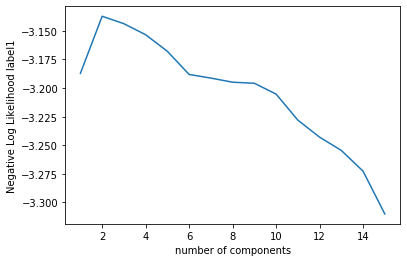

In [483]:
n_c1= model_selection(x_train1000_d1)

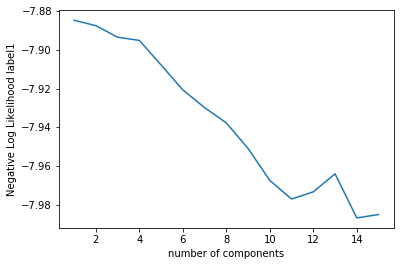

In [482]:
n_c2= model_selection(x_train1000_d2)

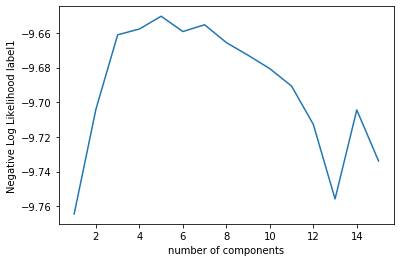

In [481]:
n_c3= model_selection(x_train1000_d3)

In [484]:
print(n_c1,n_c2,n_c3)

15 14 1


In [411]:
def gmm_model(components,xtrain):
    gmm_model = GaussianMixture(components).fit(xtrain)
    return gmm_model

In [412]:
gmm_model_1 = gmm_model(n_c1,x_train_d1)
mean_1 = gmm_model_1.means_
cov_1 = np.array(gmm_model_1.covariances_)
w_1 = gmm_model_1.weights_
cov_1

array([[[ 1.00000000e-06, -1.17343060e-29],
        [-1.17343060e-29,  1.00000000e-06]],

       [[ 7.13387888e-02, -1.32960121e-02],
        [-1.32960121e-02,  1.59795694e-01]],

       [[ 1.00000000e-06,  9.46633086e-29],
        [ 9.46633086e-29,  1.00000000e-06]],

       [[ 1.00000000e-06, -6.70531769e-29],
        [-6.70531769e-29,  1.00000000e-06]],

       [[ 1.00000000e-06,  3.03711449e-29],
        [ 3.03711449e-29,  1.00000000e-06]],

       [[ 1.00000000e-06,  8.13512809e-30],
        [ 8.13512809e-30,  1.00000000e-06]],

       [[ 2.42788639e-02, -1.87981870e-02],
        [-1.87981870e-02,  3.67276174e-02]],

       [[ 1.00000000e-06, -2.56379794e-29],
        [-2.56379794e-29,  1.00000000e-06]],

       [[ 4.37233884e-01,  1.69876686e-01],
        [ 1.69876686e-01,  1.43766937e-01]],

       [[ 1.00000000e-06, -7.59278621e-30],
        [-7.59278621e-30,  1.00000000e-06]],

       [[ 1.00000000e-06, -3.68792473e-29],
        [-3.68792473e-29,  1.00000000e-06]],

       [[ 

In [413]:
gmm_model_2 = gmm_model(n_c2,x_train_d2)
mean_2 = gmm_model_2.means_
cov_2 = gmm_model_2.covariances_
w_2 = gmm_model_2.weights_
cov_2

array([[[ 1.23029663e+00, -1.10507411e+00],
        [-1.10507411e+00,  9.92598850e-01]],

       [[ 1.91412937e+00,  2.73569704e-02],
        [ 2.73569704e-02,  7.95157826e-01]],

       [[ 2.25886802e+00, -3.49263061e-01],
        [-3.49263061e-01,  5.40035973e-02]],

       [[ 1.99226891e+00, -2.27621705e+00],
        [-2.27621705e+00,  1.64094491e+01]],

       [[ 1.00000000e-06,  1.24955567e-27],
        [ 1.24955567e-27,  1.00000000e-06]],

       [[ 1.00000000e-06,  8.51969778e-28],
        [ 8.51969778e-28,  1.00000000e-06]],

       [[ 9.09472599e-01, -9.54212491e-02],
        [-9.54212491e-02,  2.71132779e-01]],

       [[ 1.00000000e-06,  2.62532909e-27],
        [ 2.62532909e-27,  1.00000000e-06]],

       [[ 4.03183697e+00, -7.37050922e+00],
        [-7.37050922e+00,  1.34738641e+01]],

       [[ 1.04175463e+00, -9.78871294e-01],
        [-9.78871294e-01,  9.19785662e-01]],

       [[ 1.91315872e-03, -8.07641047e-02],
        [-8.07641047e-02,  3.41124534e+00]],

       [[ 

In [414]:
gmm_model_3 = gmm_model(n_c3,x_train_d3)
mean_3 = gmm_model_3.means_
cov_3 = gmm_model_3.covariances_
w_3 = gmm_model_3.weights_
cov_3

array([[[ 5.56698130e+01, -3.13445565e+00],
        [-3.13445565e+00,  7.47589164e+01]],

       [[ 2.99167611e+01, -4.42855567e+01],
        [-4.42855567e+01,  1.27469820e+02]],

       [[ 3.82882616e+01, -2.11507442e+01],
        [-2.11507442e+01,  1.30416854e+02]],

       [[ 2.80503960e+00,  5.93555876e+00],
        [ 5.93555876e+00,  5.03613549e+01]],

       [[ 1.00000000e-06,  2.57484199e-27],
        [ 2.57484199e-27,  1.00000000e-06]],

       [[ 5.20656437e+01,  7.36396442e+01],
        [ 7.36396442e+01,  1.06090951e+02]],

       [[ 8.66530124e+00, -1.54893594e+01],
        [-1.54893594e+01,  2.76874726e+01]],

       [[ 2.03052921e+01, -1.11369081e+01],
        [-1.11369081e+01,  9.27323843e+01]],

       [[ 1.00781968e+01,  2.82400077e+01],
        [ 2.82400077e+01,  1.40977788e+02]],

       [[ 1.97881957e+01,  9.22333065e+00],
        [ 9.22333065e+00,  4.29902017e+00]],

       [[ 1.00000000e-06, -1.37324906e-26],
        [-1.37324906e-26,  1.00000000e-06]],

       [[ 

In [415]:
x_train_d1.shape

(31, 2)

In [416]:
def calc_pdf(x,mean,cov,weight,ncomp):
    add = np.zeros((np.shape(x)[0],1))
    for i in range(np.shape(weight)[0]):
        
        add += np.reshape((weight[i])*multivariate_normal.pdf(x,mean[i],cov[i]),(np.shape(x)[0],1))
        
    return add


[0.006193198546347389,
 0.06223634275616382,
 0.10375754656472129,
 0.12292247940087611,
 0.16537431991558943,
 0.22267331826943987,
 0.279711769073375,
 0.3198478876268463,
 0.3242284399025547,
 0.37930714444491,
 0.38998393825012817,
 0.3919534612622647,
 0.414216469679013,
 0.46644959234593525,
 0.5213217830880876,
 0.5767796645322926,
 0.6279910420925642,
 0.6718687742817009,
 0.6989880950226476,
 0.7559467391071217,
 0.8115047607740358,
 0.8301342565853312,
 0.8764945037794423,
 0.8768479275020507,
 0.9220436475904965,
 0.9614724012242286,
 0.9646898276732967,
 0.9648016746029284,
 1.021289192434162,
 1.0777549563498305,
 1.11615512183131]

In [417]:
X_test = testset[:,0:2]
y_test = testset[:,-1]
len(X_test)

10000

In [418]:

pdf_test_1 = calc_pdf(X_test,mean_1,cov_1,w_1,n_c1)
pdf_test_1

array([[0.00000000e+000],
       [0.00000000e+000],
       [2.41885708e-105],
       ...,
       [1.58694452e-017],
       [2.32599524e-151],
       [0.00000000e+000]])

In [419]:

pdf_test_2 = calc_pdf(X_test,mean_2,cov_2,w_2,n_c2)
pdf_test_2

array([[9.16092901e-34],
       [8.45295236e-62],
       [1.08002363e-13],
       ...,
       [1.18570975e-07],
       [2.67220487e-11],
       [0.00000000e+00]])

In [420]:
pdf_test_3 = calc_pdf(X_test,mean_3,cov_3,w_3,n_c3)


In [421]:
pdf_test_1 = np.array(pdf_test_1)
pdf_test_2 = np.array(pdf_test_2)
pdf_test_3 = np.array(pdf_test_3)
type(0.28)

float

In [422]:
MAP1 = np.multiply(pdf_test_1,p[0])
MAP2 = np.multiply(pdf_test_2,p[1])
MAP3 = np.multiply(pdf_test_3,p[2])

In [423]:
MAP1 = np.reshape(MAP1,(10000,1))
MAP1

array([[0.00000000e+000],
       [0.00000000e+000],
       [7.49845694e-106],
       ...,
       [4.91952800e-018],
       [7.21058526e-152],
       [0.00000000e+000]])

In [424]:
MAP2 = np.reshape(MAP2,(10000,1))
MAP2

array([[2.65666941e-34],
       [2.45135618e-62],
       [3.13206852e-14],
       ...,
       [3.43855827e-08],
       [7.74939412e-12],
       [0.00000000e+00]])

In [425]:
MAP3 = np.reshape(MAP3,(10000,1))
MAP3

array([[3.73245880e-07],
       [4.14350739e-08],
       [6.17257274e-08],
       ...,
       [2.24274373e-08],
       [3.52642687e-07],
       [1.51568045e-04]])

In [426]:
MAP = np.concatenate((MAP1,MAP2,MAP3),axis  = 1)

In [427]:
pred = np.argmax(MAP,axis=1)+1

In [428]:
pred

array([3, 3, 3, ..., 2, 3, 3], dtype=int64)

In [429]:
col = ['label']
df = pd.DataFrame(pred,columns=col)

In [430]:
(df['label'] ==1).sum()


2092

In [431]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
acc

0.6262

FOR 500 SAMPLES

11 1 12


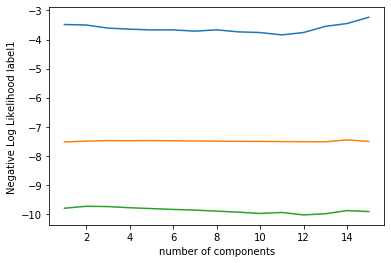

In [386]:
n_c1_5= model_selection(x_train500_d1)
n_c2_5= model_selection(x_train500_d2)
n_c3_5= model_selection(x_train500_d3)
print(n_c1_5,n_c2_5,n_c3_5)

In [387]:
gmm_model_1_5 = gmm_model(n_c1_5,x_train500_d1)
mean_1_5 = gmm_model_1_5.means_
cov_1_5 = np.array(gmm_model_1_5.covariances_)
w_1_5 = gmm_model_1_5.weights_


In [388]:
gmm_model_2_5 = gmm_model(n_c2_5,x_train500_d2)
mean_2_5 = gmm_model_2_5.means_
cov_2_5 = np.array(gmm_model_2_5.covariances_)
w_2_5 = gmm_model_2_5.weights_


In [389]:
gmm_model_3_5 = gmm_model(n_c3_5,x_train500_d3)
mean_3_5 = gmm_model_3_5.means_
cov_3_5 = np.array(gmm_model_3_5.covariances_)
w_3_5 = gmm_model_3_5.weights_


In [390]:
pdf1_5 = calc_pdf(x_train500_d1,mean_1_5,cov_1_5,w_1_5,n_c1_5)
pdf2_5 = calc_pdf(x_train500_d2,mean_2_5,cov_2_5,w_2_5,n_c2_5)
pdf3_5 = calc_pdf(x_train500_d3,mean_3_5,cov_3_5,w_3_5,n_c3_5)

In [391]:
pdf_test_1_5 = calc_pdf(X_test,mean_1_5,cov_1_5,w_1_5,n_c1_5)
pdf_test_2_5= calc_pdf(X_test,mean_2_5,cov_2_5,w_2_5,n_c2_5)
pdf_test_3_5 = calc_pdf(X_test,mean_3_5,cov_3_5,w_3_5,n_c3_5)


In [392]:
pdf_test_1_5 = np.array(pdf_test_1_5)
pdf_test_2_5 = np.array(pdf_test_2_5)
pdf_test_3_5 = np.array(pdf_test_3_5)

MAP1_5 = np.multiply(pdf_test_1_5,p_500[0])
MAP2_5 = np.multiply(pdf_test_2_5,p_500[1])
MAP3_5 = np.multiply(pdf_test_3_5,p_500[2])

In [393]:
MAP1_5 = np.reshape(MAP1_5,(10000,1))
MAP2_5 = np.reshape(MAP2_5,(10000,1))
MAP3_5 = np.reshape(MAP3_5,(10000,1))

MAP_5 = np.concatenate((MAP1_5,MAP2_5,MAP3_5),axis = 1)

pred_5 = np.argmax(MAP_5,axis=1)+1
acc_5 = accuracy_score(y_test,pred_5)

In [397]:
print('accuracy on 500 samples:',acc_5)

accuracy on 500 samples: 0.9469


In [395]:
y_test

array([2., 2., 2., ..., 1., 2., 3.])

FOR 1000 SAMPLES

14 13 15


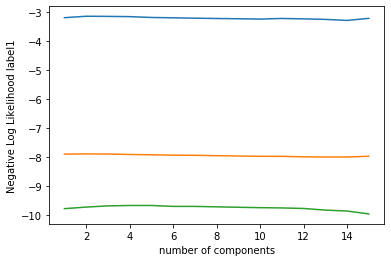

In [471]:
n_c1_10= model_selection(x_train1000_d1)
n_c2_10= model_selection(x_train1000_d2)
n_c3_10= model_selection(x_train1000_d3)
print(n_c1_10,n_c2_10,n_c3_10)

In [485]:
gmm_model_1_10 = gmm_model(15,x_train1000_d1)
mean_1_10 = gmm_model_1_10.means_
cov_1_10 = np.array(gmm_model_1_10.covariances_)
w_1_10 = gmm_model_1_10.weights_


In [486]:
gmm_model_2_10 = gmm_model(14,x_train1000_d2)
mean_2_10 = gmm_model_2_10.means_
cov_2_10 = np.array(gmm_model_2_10.covariances_)
w_2_10 = gmm_model_2_10.weights_


In [487]:
gmm_model_3_10 = gmm_model(1,x_train1000_d3)
mean_3_10 = gmm_model_3_10.means_
cov_3_10 = np.array(gmm_model_3_10.covariances_)
w_3_10 = gmm_model_3_10.weights_


In [488]:
pdf1_10 = calc_pdf(x_train1000_d1,mean_1_10,cov_1_10,w_1_10,n_c1_10)
pdf2_10 = calc_pdf(x_train1000_d2,mean_2_10,cov_2_10,w_2_10,n_c2_10)
pdf3_10 = calc_pdf(x_train1000_d3,mean_3_10,cov_3_10,w_3_10,n_c3_10)

In [489]:
pdf_test_1_10 = calc_pdf(X_test,mean_1_10,cov_1_10,w_1_10,n_c1_10)
pdf_test_2_10= calc_pdf(X_test,mean_2_10,cov_2_10,w_2_10,n_c2_10)
pdf_test_3_10 = calc_pdf(X_test,mean_3_10,cov_3_10,w_3_10,n_c3_10)


In [490]:
pdf_test_1_10 = np.array(pdf_test_1_10)
pdf_test_2_10 = np.array(pdf_test_1_10)
pdf_test_3_10 = np.array(pdf_test_1_10)

MAP1_10 = np.multiply(pdf_test_1_10,p_1000[0])
MAP2_10 = np.multiply(pdf_test_2_10,p_1000[1])
MAP3_10 = np.multiply(pdf_test_3_10,p_1000[2])

In [491]:
MAP1_10 = np.reshape(MAP1_10,(10000,1))
MAP2_10 = np.reshape(MAP2_10,(10000,1))
MAP3_10 = np.reshape(MAP3_10,(10000,1))

MAP_10 = np.concatenate((MAP1_10,MAP2_10,MAP3_10),axis = 1)

pred_10 = np.argmax(MAP_10,axis=1)+1

acc_10 = accuracy_score(y_test,pred_10)
y_test

array([2., 2., 2., ..., 1., 2., 3.])

In [492]:
acc_10

0.1261